In [1]:
"""
This file splits the dataset into training and test sets using an 80-20 split. It then produces our three algorithms 
(KNN, Logistic Regression, and Decision Tree) and performs cross-validation. The models are compared based on 
precision and accuracy levels, with the highest performing model identified at the end.
"""

'\nThis file splits the dataset into training and test sets using an 80-20 split. It then produces our three algorithms \n(KNN, Logistic Regression, and Decision Tree) and performs cross-validation. The models are compared based on \nprecision and accuracy levels, with the highest performing model identified at the end.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.utils import shuffle
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [3]:
# Read in CSV of cleaned/preprocessed data
df = pd.read_csv(r"C:\Users\Brian\.jupyter\DS4002-Project1\data\preprocessed_data.csv")
df.head()

,Email Text,Spam or Not Spam,Text Length,Word Count,Sentence Count,Preprocessed Text
0,Subject: naturally irresistible your corporate...,Spam,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,Spam,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,Spam,448,88,4,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,Spam,500,99,5,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",Spam,235,53,9,money get softwar cd softwar compat great grow...


In [4]:
# Extract labels and features
X = df["Preprocessed Text"]  # Preprocessed text data
y = df["Spam or Not Spam"]  # Target labels


In [5]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# Convert text to numerical representation using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Can fine-tune max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [7]:
# Hyperparameter ranges
knn_k_values = [3, 5, 10, 15]  # Different k values for KNN
decision_tree_depths = [5, 10, 15, 20]  # Different depths for Decision Tree
cross_validation_levels = [5, 10, 15]  # Different levels of cross-validation


In [8]:
# Initialize models with tuning capability
models = {"Logistic Regression": LogisticRegression(max_iter=1000)}


In [9]:
# Add different KNN models
for k in knn_k_values:
    models[f"KNN (k={k})"] = KNeighborsClassifier(n_neighbors=k)

# Add different Decision Tree models
for depth in decision_tree_depths:
    models[f"Decision Tree (depth={depth})"] = DecisionTreeClassifier(max_depth=depth)

# Train, evaluate, and perform cross-validation
results = []
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)

    for cv in cross_validation_levels:
        cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=cv, scoring='accuracy')

        # Evaluate on test set
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label="Spam")

        # Save results to the list
        results.append({
            "Model": name,
            "Cross-Validation Folds": cv,
            "Test Accuracy": accuracy,
            "Precision": precision,
            "Cross-Validation Accuracy": np.mean(cv_scores)
        })


In [10]:
# Convert results to DataFrame and save as CSV
results_df = pd.DataFrame(results)
results_df.to_csv("model_results.csv", index=False)

# Display results
for result in results:
    print(f"{result['Model']} (CV={result['Cross-Validation Folds']}):")
    print(f"  Test Accuracy: {result['Test Accuracy']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Cross-Validation Accuracy: {result['Cross-Validation Accuracy']:.4f}")
    print("-" * 40)

# Identify the best performing model for accuracy
best_model = max(results, key=lambda r: r["Test Accuracy"])
if best_model["Test Accuracy"] >= 0.95:
    print(f"{best_model['Model']} (CV={best_model['Cross-Validation Folds']}) meets/exceeds 95% accuracy.")
else:
    print(f"No model reached 95% accuracy. Further tuning is needed.")

# Identify the best performing model for precision
best_model = max(results, key=lambda r: r["Precision"])
if best_model["Precision"] >= 0.95:
    print(f"{best_model['Model']} (CV={best_model['Cross-Validation Folds']}) meets/exceeds 95% precision.")
else:
    print(f"No model reached 95% precision. Further tuning is needed.")

Logistic Regression (CV=5):
  Test Accuracy: 0.9825
  Precision: 0.9847
  Cross-Validation Accuracy: 0.9819
----------------------------------------
Logistic Regression (CV=10):
  Test Accuracy: 0.9825
  Precision: 0.9847
  Cross-Validation Accuracy: 0.9834
----------------------------------------
Logistic Regression (CV=15):
  Test Accuracy: 0.9825
  Precision: 0.9847
  Cross-Validation Accuracy: 0.9836
----------------------------------------
KNN (k=3) (CV=5):
  Test Accuracy: 0.9834
  Precision: 0.9670
  Cross-Validation Accuracy: 0.9777
----------------------------------------
KNN (k=3) (CV=10):
  Test Accuracy: 0.9834
  Precision: 0.9670
  Cross-Validation Accuracy: 0.9814
----------------------------------------
KNN (k=3) (CV=15):
  Test Accuracy: 0.9834
  Precision: 0.9670
  Cross-Validation Accuracy: 0.9817
----------------------------------------
KNN (k=5) (CV=5):
  Test Accuracy: 0.9852
  Precision: 0.9813
  Cross-Validation Accuracy: 0.9780
----------------------------------

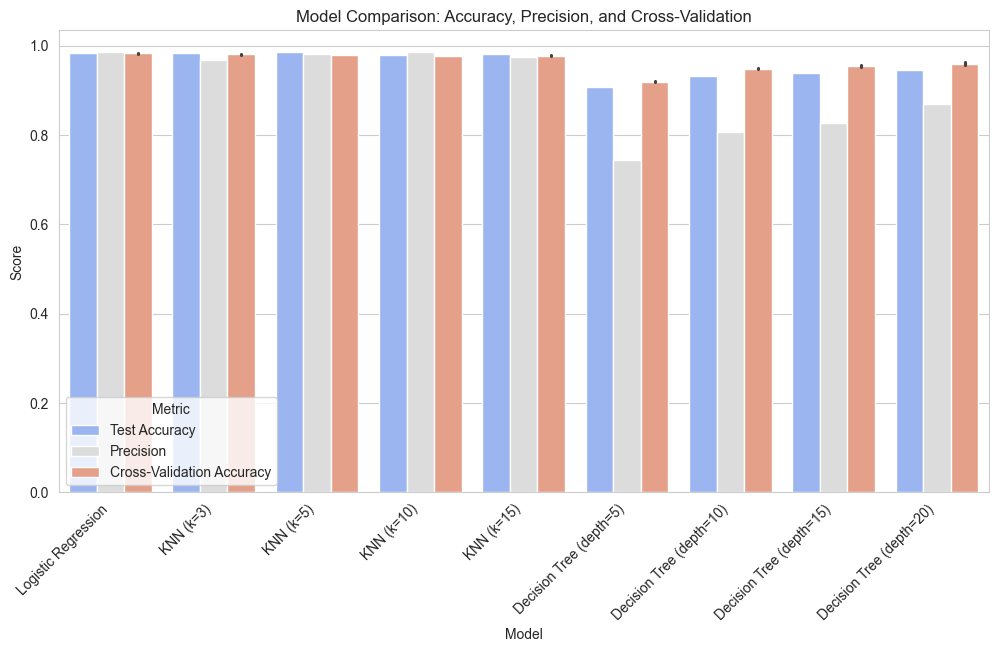

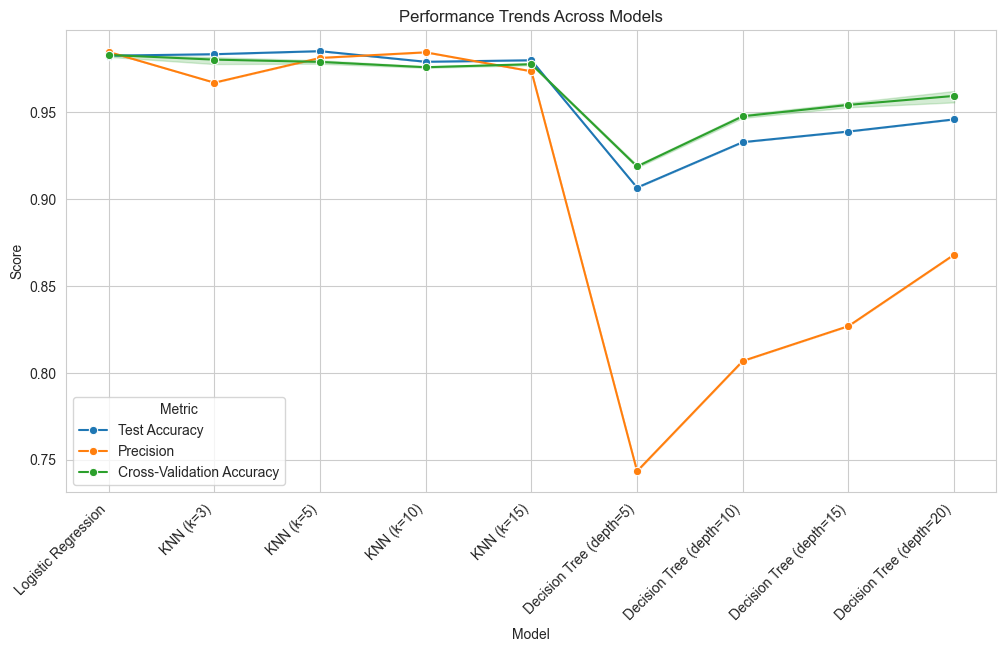

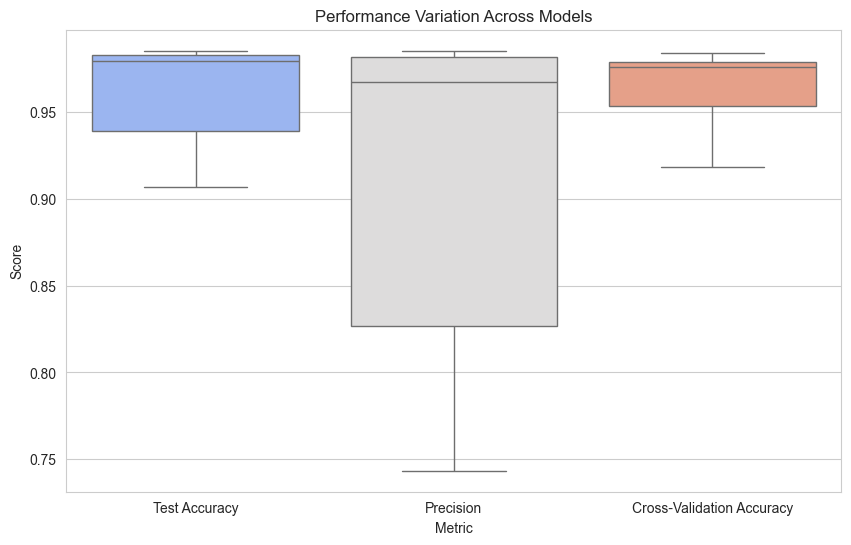

In [11]:
#Load the results CSV
results_df = pd.read_csv("model_results.csv")

#Set style of graphs
sns.set_style("whitegrid")

#Grouped Bar Chart (for comparing all three variables between each of the models)
plt.figure(figsize=(12, 6))
metrics = ["Test Accuracy", "Precision", "Cross-Validation Accuracy"]
results_df_melted = results_df.melt(id_vars=["Model"], value_vars=metrics, var_name="Metric", value_name="Score")

sns.barplot(data=results_df_melted, x="Model", y="Score", hue="Metric", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison: Accuracy, Precision, and Cross-Validation")
plt.legend(title="Metric")
plt.show()

#Line Plot (for performance trends across models)
plt.figure(figsize=(12, 6))
for metric in metrics:
    sns.lineplot(data=results_df, x="Model", y=metric, marker="o", label=metric)

plt.xticks(rotation=45, ha="right")
plt.title("Performance Trends Across Models")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

#Box Plot (showing the distribution of scores)
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df_melted, x="Metric", y="Score", hue="Metric", palette="coolwarm", dodge=False)
plt.title("Performance Variation Across Models")
plt.show()

In [12]:
from scipy.stats import pearsonr

# Load results
results_df = pd.read_csv("model_results.csv")

# Encode model names numerically
results_df["Model_Num"] = results_df["Model"].astype("category").cat.codes  #Assigns numerical values to models

# Compute Pearson Correlation
correlations = {}
for metric in ["Test Accuracy", "Precision", "Cross-Validation Accuracy"]:
    r_value, p_value = pearsonr(results_df["Model_Num"], results_df[metric])
    correlations[metric] = {"r-value": r_value, "p-value": p_value}

# Convert to DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient="index")
print("Pearson Correlation Coefficients:")
print(corr_df)

Pearson Correlation Coefficients:
                            r-value   p-value
Test Accuracy              0.767846  0.000003
Precision                  0.780721  0.000002
Cross-Validation Accuracy  0.678203  0.000101
